In [128]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [129]:
##Create syntathic datapoints 

from sklearn.datasets import make_classification

In [130]:
X,y = make_classification(n_samples=1000,n_features=2, n_classes=2,n_clusters_per_class=2, n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

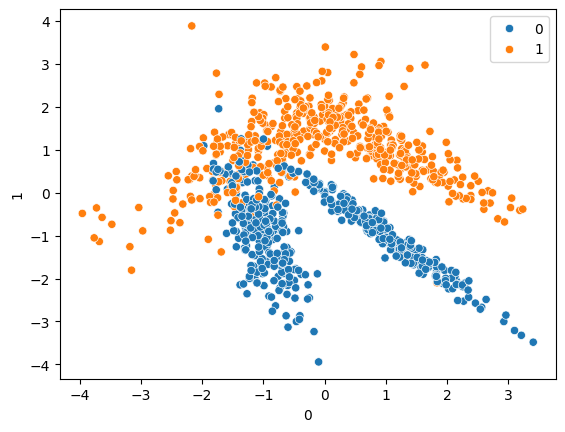

In [131]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [132]:
from sklearn.model_selection import train_test_split

X_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=10)

In [133]:
from sklearn.svm import SVC


In [134]:
svc = SVC(kernel='linear')

In [135]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [136]:
#prediction

y_pred = svc.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       121
           1       0.86      0.88      0.87       129

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

[[103  18]
 [ 16 113]]


In [137]:
rbf = SVC(kernel="rbf")

In [138]:
rbf.fit(X_train,y_train)

SVC()

In [139]:
y_pred1 = rbf.predict(x_test)

In [140]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       121
           1       0.86      0.88      0.87       129

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

[[103  18]
 [ 16 113]]


In [141]:
polynomial = SVC(kernel="poly")

polynomial.fit(X_train,y_train)

#prediction
y_pred2 = polynomial.predict(x_test)

print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       121
           1       0.91      0.74      0.82       129

    accuracy                           0.83       250
   macro avg       0.84      0.83      0.83       250
weighted avg       0.85      0.83      0.83       250

[[112   9]
 [ 33  96]]


In [142]:
sigmoid = SVC(kernel="sigmoid")

sigmoid.fit(X_train,y_train)

#prediction
y_pred3 = sigmoid.predict(x_test)

print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       121
           1       0.81      0.90      0.85       129

    accuracy                           0.84       250
   macro avg       0.84      0.83      0.83       250
weighted avg       0.84      0.84      0.84       250

[[ 93  28]
 [ 13 116]]


## Hyperparameter tuning with SVC

In [146]:
from sklearn.model_selection import  GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],
              'gamma': [1,0,0.1,0.001,0.001,0.0001],
              'kernel':['rbf']}

In [147]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [148]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=0, kernel=rbf;, score=0.513 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=0, kernel=rbf;, score=0.507 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=0, kernel=rbf;, score=0.507 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=0, kernel=rbf;, score=0.507 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=0, kernel=rbf;, score=0.507 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0, 0.1, 0.001, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [149]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [150]:

#prediction
y_pred4 = grid.predict(x_test)

print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       121
           1       0.92      0.94      0.93       129

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[111  10]
 [  8 121]]
